# Optimization using SciPy

### Simple Optimization (Minimum and Maximum)

In [55]:
%matplotlib inline

In [56]:
import matplotlib.pyplot as plt
import numpy as np

- Define a function: $f(x) = x^2+10\sin(x)$

In [57]:
def f(x):
    return x**2 + 10*np.sin(x)

In [58]:
x = np.linspace(-10, 10, 51)
x

array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
        -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
        -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
         0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
         4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
         8. ,   8.4,   8.8,   9.2,   9.6,  10. ])

In [59]:
y = f(x)
y

array([105.44021111,  93.90326781,  82.41110086,  71.59082807,
        62.01401092,  54.10641753,  48.08080328,  43.90332136,
        41.29886649,  39.79450795,  38.79415498,  37.67266638,
        35.87454656,  33.00164609,  28.87602074,  23.56802495,
        17.38520443,  10.82374143,   4.4901185 ,  -0.99463181,
        -5.09297427,  -7.43573603,  -7.88039086,  -6.53356091,
        -3.73418342,   0.        ,   4.05418342,   7.81356091,
        10.76039086,  12.55573603,  13.09297427,  12.51463181,
        11.1898815 ,   9.65625857,   8.53479557,   8.43197505,
         9.84397926,  13.07835391,  18.20545344,  25.04733362,
        33.20584502,  42.12549205,  51.18113351,  59.77667864,
        67.43919672,  73.89358247,  79.10598908,  83.28917193,
        86.86889914,  90.41673219,  94.55978889])

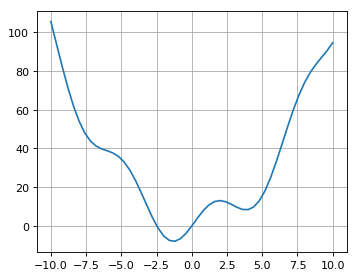

In [60]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.grid()
plt.show()

In [61]:
import scipy.optimize as opt

In [62]:
x0 = 0

- Find a minimum of the function `f(x)` using the BFGS (Broyden–Fletcher–Goldfarb–Shanno) method, starting from a initial point `x0 = 0`.

In [63]:
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
    opt.fmin_bfgs(f,  # Objective function to be minimized.
              x0=0,  # Initial guess.
              maxiter=2000,  # Maximum number of iterations to perform.
              full_output=True)  # Return fopt, func_calls, grad_calls, and warnflag in addition to xopt.

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


In [64]:
xopt

array([-1.30644012])

In [65]:
fopt

-7.945823375615215

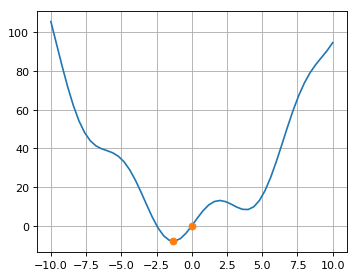

In [66]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt], [f(x0), fopt], 'o')
plt.grid()
plt.show()

- What if we start from x0 = 6?

In [67]:
x0 = 6

In [68]:
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
    opt.fmin_bfgs(f,  # Objective function to be minimized.
              x0=6,  # Initial guess.
              maxiter=2000,  # Maximum number of iterations to perform.
              full_output=True)  # Return fopt, func_calls, grad_calls, and warnflag in addition to xopt.

Optimization terminated successfully.
         Current function value: 8.315586
         Iterations: 7
         Function evaluations: 24
         Gradient evaluations: 8


In [69]:
xopt

array([3.83746709])

In [70]:
fopt

8.315585579477458

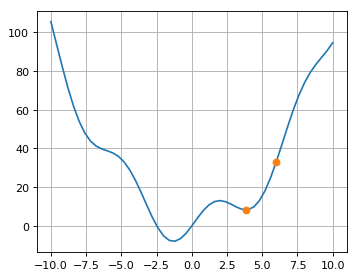

In [71]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt], [f(x0), fopt], 'o')
plt.grid('on')
plt.show()

- Find the global minimum using the basinhopping method.

In [87]:
res = opt.basinhopping(f, 
                     x0=6, 
                     T=1,  # The “temperature” parameter
                     stepsize=2)  # Initial step size
res

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[0.08578534]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1809
                        nit: 100
                       njev: 603
                          x: array([-1.30644001])

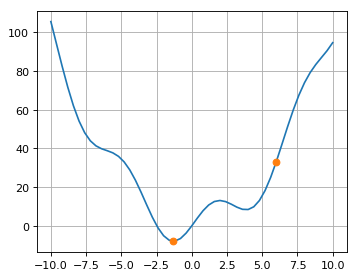

In [73]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, res.x], [f(x0), res.fun], 'o')
plt.grid('on')
plt.show()

### Solving Equations

- Solve the equation $f(x)=x^2+10\sin(x)=0$.

In [74]:
x0 = 1
xopt = opt.fsolve(f, x0)  # Find a root with initial guess x0
xopt

array([0.])

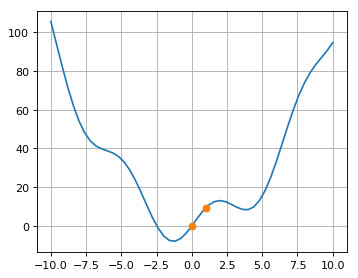

In [75]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt], [f(x0), f(xopt)], 'o')
plt.grid('on')
plt.show()

In [76]:
x0 = -3
xopt = opt.fsolve(f, x0)  # Find a root with initial guess x0
xopt

array([-2.47948183])

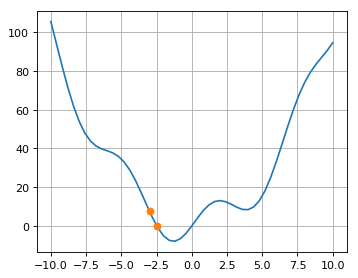

In [77]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt], [f(x0), f(xopt)], 'o')
plt.grid('on')
plt.show()

### Curve Fitting

- Curve fitting is a procedure for finding the best-fitting curve to a given set of points by minimizing the sum of the squares of the offsets ("the residuals") of the points from the curve.
<img src="images/curve_fitting_1.png" alt="Curve Fitting 1", style="width: 150px;"/>
<img src="images/curve_fitting_2.png" alt="Curve Fitting 2", style="width: 150px;"/>
<img src="images/curve_fitting_3.png" alt="Curve Fitting 3", style="width: 150px;"/>

In [78]:
x

array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
        -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
        -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
         0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
         4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
         8. ,   8.4,   8.8,   9.2,   9.6,  10. ])

In [79]:
y

array([105.44021111,  93.90326781,  82.41110086,  71.59082807,
        62.01401092,  54.10641753,  48.08080328,  43.90332136,
        41.29886649,  39.79450795,  38.79415498,  37.67266638,
        35.87454656,  33.00164609,  28.87602074,  23.56802495,
        17.38520443,  10.82374143,   4.4901185 ,  -0.99463181,
        -5.09297427,  -7.43573603,  -7.88039086,  -6.53356091,
        -3.73418342,   0.        ,   4.05418342,   7.81356091,
        10.76039086,  12.55573603,  13.09297427,  12.51463181,
        11.1898815 ,   9.65625857,   8.53479557,   8.43197505,
         9.84397926,  13.07835391,  18.20545344,  25.04733362,
        33.20584502,  42.12549205,  51.18113351,  59.77667864,
        67.43919672,  73.89358247,  79.10598908,  83.28917193,
        86.86889914,  90.41673219,  94.55978889])

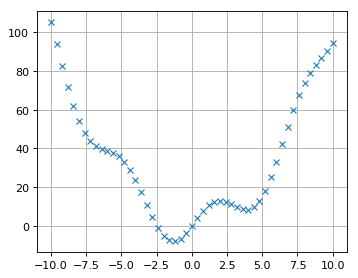

In [80]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y, 'x')
plt.grid('on')
plt.show()

In [81]:
y_noise = f(x) + 5*np.random.randn(x.size)  # Add some random noise
y_noise

array([ 1.10889700e+02,  9.38385142e+01,  8.47538782e+01,  7.51950910e+01,
        5.83893836e+01,  5.63493333e+01,  5.29039589e+01,  3.92616062e+01,
        4.68566206e+01,  4.83101712e+01,  4.14130648e+01,  4.20829852e+01,
        3.77468400e+01,  3.60008235e+01,  2.44646596e+01,  1.87034748e+01,
        1.73147122e+01,  6.51696022e+00, -5.85975395e+00, -1.50310955e+00,
        3.99513316e+00, -5.60730530e+00, -3.23694281e+00, -3.63237209e+00,
       -3.72532269e+00, -4.63712455e+00, -4.31812008e+00,  1.01720844e+01,
        1.16191199e+01,  1.77548399e+01,  9.37572062e+00,  1.28729762e+01,
        1.36150574e+01,  1.37575081e+01,  8.32447499e-02,  9.54401064e+00,
        8.75174466e+00,  9.06960261e+00,  2.29497814e+01,  2.47771718e+01,
        3.07651020e+01,  4.97488782e+01,  4.66982388e+01,  6.35083911e+01,
        6.05263277e+01,  6.32422640e+01,  7.58039723e+01,  9.03721098e+01,
        8.61194761e+01,  9.34061306e+01,  9.73088877e+01])

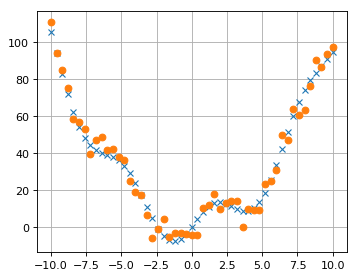

In [82]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y, 'x')
plt.plot(x, y_noise, 'o')
plt.grid('on')
plt.show()

- Fit a function $f_2(x)=ax^2+b\sin(x)$ by determining the optimal values of the coefficients `a` and `b`.

In [83]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

In [84]:
guess = [2, 2]  # Initial guess for a and b, respectively
params, cov = opt.curve_fit(f2, x, y_noise, guess)
params

array([1.01421159, 8.91726319])

In [85]:
a = params[0]
b = params[1]
y_fit = f2(x, a, b)
y_fit

array([106.27233832,  95.02425783,  83.85530086,  73.32468489,
        63.94208633,  56.08717381,  49.94966691,  45.49938354,
        42.49100507,  40.50280675,  39.00323874,  37.43484618,
        35.30227905,  32.25049701,  28.12082251,  22.97599246,
        17.09025345,  10.90606427,   4.96424136,  -0.18142421,
        -4.05159812,  -6.31707923,  -6.85077315,  -5.74775765,
        -3.310272  ,   0.        ,   3.63481971,   7.04594848,
         9.77170252,  11.50984257,  12.16529083,  11.86514171,
        10.93859636,   9.86498907,   9.19811093,   9.47877839,
        11.14945021,  14.48437301,  19.54628368,  26.17650467,
        34.01999566,  42.58140662,  51.30328267,  59.654074  ,
        67.21205584,  73.73190957,  79.1834531 ,  83.756406  ,
        87.83043692,  91.91522225,  96.56997947])

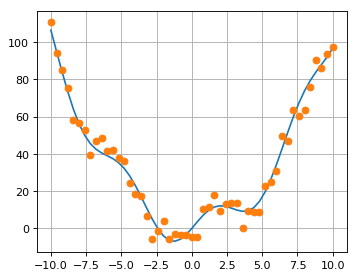

In [86]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y_fit)
plt.plot(x, y_noise, 'o')
plt.grid('on')
plt.show()

### Course Materials on YouTube and GitHub

- Course videos are hosted by YouTube (http://youtube.com/yongtwang).
- Course documents (Jupyter Notebooks and Python source code) are hosted by GitHub (http://github.com/yongtwang).